### Requests 사용법

In [1]:
### 불러오기
#서버에 페이지 정보를 요청할 때 사용
import requests as req

In [2]:
### 코드 한줄이 리퀘스트 리스폰스 모두를 발동시킨다  200코드 나옴
res=req.get('https://www.naver.com/')   

In [3]:
### 응답안되는 사례를 보여준다.  406에러
req.get('https://www.melon.com/')
# 406 : 요청실패

<Response [406]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
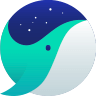
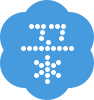

In [4]:
res.text

### BeautifulSoup 사용
-- 내가 원하는 내용만 추출

In [5]:
# !pip install beautifulsoup4

In [6]:
### 뷰티플 스프 불러오기
from bs4 import BeautifulSoup as bs

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
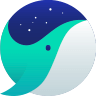
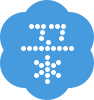

In [7]:
# bs(파싱할 데이터,파싱방법 )    
### 데이터를 바꿔주는것을 파싱이라고도 부른다.   lxml 방식이 가장 빠르게 파싱된다고한다. 
### 방법은 달라도 결과물은 같다고 한다 
soup= bs(res.text,'lxml')
soup

In [8]:
###    'a' 모든 a태그를 가져온 것이다.   'a.nav' 클래스가 nav이면서 a태그  
##### 셀렉터 지정만 잘하면 soup의 대부분이 끝이라고 한다. 
soup.select('a.nav')[2].text

'블로그'

In [9]:
result= soup.select('a.nav')

In [10]:
  ### 가져온 데이터를 리스트 타입 변수에 담아둔다
li = []

for i in result:
    ##print(i.text)
    li.append(i.text)

In [11]:
res1=req.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B4%91%EC%A3%BC%EB%82%A0%EC%94%A8')
soup1=bs(res1.text,'lxml' )

In [12]:
result1=soup1.select('div.temperature_text > strong')[0].text

In [13]:
result1

'현재 온도16.0°'

In [14]:
### 이것도 가능 
soup1.select('strong')[10].text

'현재 온도16.0°'

### 태그 제거

In [15]:
span =soup1.select('div.temperature_text > strong >span') ### 지우고 싶은 태그이다 div의 자식인 스트롱의 자식인 span

In [16]:
for i in span:
    i.extract()

In [17]:
soup1.select('div.temperature_text > strong' )  ### span태그 삭제된 상태  ### 지우고싶은 태그를 명확하게 짚어야한다

[<strong>16.0</strong>,
 <strong>13</strong>,
 <strong>26</strong>,
 <strong>15</strong>,
 <strong>25</strong>]

### 멜론페이지 가져오기

In [18]:
### 보안 때문에 406 코드가 나오는 상태이다 
##### headers 값에 정상적으로 접속했을때 나오는 내용을 넣어서 들어간다
url='https://www.melon.com/'
res=req.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36' })
soup=bs(res.text,'lxml')
print(res)

<Response [200]>


In [19]:
url2='https://www.melon.com/chart/index.htm'
res2=req.get(url2,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36' })
soup2=bs(res2.text,'lxml')
print(res2)


<Response [200]>


In [20]:
##result2=soup2.select('span > a')[0].text
f=soup2.select('div.rank01>span>a')

In [21]:
len(f)

100

In [22]:
for i in f:
    print(i.text)
    ###print(i.text.strip() ) ### 스트립함수를 넣으면 각종 부호들을 삭제해준다. rank1까지만 넣고싶을때 사용
    

That That (prod. & feat. SUGA of BTS)
봄여름가을겨울 (Still Life)
LOVE DIVE
TOMBOY
사랑인가 봐
Feel My Rhythm
사랑은 늘 도망가
LOVE me
정이라고 하자 (Feat. 10CM)
우리들의 블루스
다시 만날 수 있을까
GANADARA (Feat. 아이유)
ZOOM
취중고백
나의 X에게
INVU
듣고 싶을까
신호등
이제 나만 믿어요
ELEVEN
무지개
다정히 내 이름을 부르면
아버지
MY BAG
손이 참 곱던 그대
A bientot
Seoul
사랑해 진짜
Celeb
연애편지
FEARLESS
STAY
사랑역
That's Hilarious
SMILEY (Feat. BIBI)
인생찬가
보금자리
사랑해요 그대를
언제나 사랑해
RUN2U
너를 생각해
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)
드라마
Next Level
아무래도 난
Dynamite
Weekend
With you
strawberry moon
리무진 (Feat. MINO) (Prod. GRAY)
존재만으로
Butter
Good Boy Gone Bad
감동이야 (feat. 성시경)
Step Back
호랑수월가
Permission to Dance
내가 아니라도
너의 모든 순간
라일락
스물다섯, 스물하나
눈이 오잖아(Feat.헤이즈)
내 손을 잡아
Counting Stars (Feat. Beenzino)
바라만 본다
Real Love
OHAYO MY NIGHT
abcdefu
사랑인걸
Savage
초대
봄날
Celebrity
문득
너, 너 (N번째 연애 X 휘인 (Whee In))
너의 번호를 누르고
찰나가 영원이 될 때 (The Eternal Moment)
어제처럼
Bad Habits
밤하늘의 별을(2020)
Blueming
My Universe
고백
Dreams Come True
내 곁에
사이렌 Remix (Feat. UNEDUCATED KID, Paul Blanco)
모든 날, 모든 순간 (Every day, Every 